# Install the required packages

In [ ]:
!cat /proc/meminfo

MemTotal:       13302924 kB
MemFree:        11844428 kB
MemAvailable:   12320508 kB
Buffers:           79936 kB
Cached:           576444 kB
SwapCached:            0 kB
Active:           794832 kB
Inactive:         470132 kB
Active(anon):     591640 kB
Inactive(anon):      416 kB
Active(file):     203192 kB
Inactive(file):   469716 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               596 kB
Writeback:             0 kB
AnonPages:        608576 kB
Mapped:           218504 kB
Shmem:              1160 kB
KReclaimable:      89292 kB
Slab:             133560 kB
SReclaimable:      89292 kB
SUnreclaim:        44268 kB
KernelStack:        5680 kB
PageTables:         7956 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    3838696 kB
VmallocTotal:   34359738367 kB
VmallocUsed:        8184 kB
VmallocChunk:          0 kB
Percpu:          

In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
import sys
import os
from matplotlib import pyplot
from matplotlib.patches import Rectangle
import imageio
import glob
import numpy as np

In [ ]:
# Ref: https://www.geeksforgeeks.org/python-os-chdir-method/
# Ref: https://stackoverflow.com/questions/9234560/find-all-csv-files-in-a-directory-using-python/12280052 
#os.chdir(r"C:\Users\Gfg\Desktop\geeks")
#print("Directory changed")

# This is the path where you want to search
#path = '/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/Datasets/manipulated_sequences/Deepfakes/raw/videos'

# this is the extension you want to detect
extension = '.jpg'

def get_list_filenames(cwd, path, extension):
    try:
        os.chdir(path)
        print("Successfully change the directory!")
        filenames = glob.glob('*.{}'.format(extension))
        print("Number of files: ", len(filenames))

    # Caching the exception
    except: 
        print("Something wrong with specified directory. Exception- ", sys.exc_info()) 

    # handling with finally: restore the path which is the current directory before changing directory           
    finally: 
        print("Restoring the path") 
        os.chdir(cwd) # Change it back to cwd (original directory)
        print("Current directory is-", os.getcwd()) 
        
    return filenames


# Ref: https://realpython.com/python-keras-text-classification/

# Get a list of dataframe after reading all csv files given a path
def get_all_image_files_read(path, filenames):
    list_img = []
    for file in filenames:
        img = imageio.imread(path+file)
        list_img.append(img)
    return list_img

# Deepfake
## Set the Deepfake Working Directory
Finally, we decide to use only one image in a single video

In [ ]:
%cd /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Deepfake_facial_extractions
!pwd

/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Deepfake_facial_extractions
/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Deepfake_facial_extractions


In [ ]:
# initial directory 
cwd = os.getcwd()
path_org = './' # the directory where all the output result are located.
extension = 'jpg'

filename = get_list_filenames(cwd, path_org, extension)

Successfully change the directory!
Number of files:  6984
Restoring the path
Current directory is- /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Deepfake_facial_extractions


In [ ]:
print(filename[3393])
print(len(filename))

image_3380.jpg
6984


## Save Deepfake features in an array

In [ ]:
fake = []
for i in range(len(filename)):
  # add constraint
  if i % 7 == 0:
    fake.append(imageio.imread(filename[i]))
    print("Saving Img {} in an array".format(str(i)))
fake = np.array(fake)
print(fake.shape)

Saving Img 0 in an array
Saving Img 7 in an array
Saving Img 14 in an array
Saving Img 21 in an array
Saving Img 28 in an array
Saving Img 35 in an array
Saving Img 42 in an array
Saving Img 49 in an array
Saving Img 56 in an array
Saving Img 63 in an array
Saving Img 70 in an array
Saving Img 77 in an array
Saving Img 84 in an array
Saving Img 91 in an array
Saving Img 98 in an array
Saving Img 105 in an array
Saving Img 112 in an array
Saving Img 119 in an array
Saving Img 126 in an array
Saving Img 133 in an array
Saving Img 140 in an array
Saving Img 147 in an array
Saving Img 154 in an array
Saving Img 161 in an array
Saving Img 168 in an array
Saving Img 175 in an array
Saving Img 182 in an array
Saving Img 189 in an array
Saving Img 196 in an array
Saving Img 203 in an array
Saving Img 210 in an array
Saving Img 217 in an array
Saving Img 224 in an array
Saving Img 231 in an array
Saving Img 238 in an array
Saving Img 245 in an array
Saving Img 252 in an array
Saving Img 259 in 

<class 'numpy.ndarray'>
(998, 320, 320, 3)


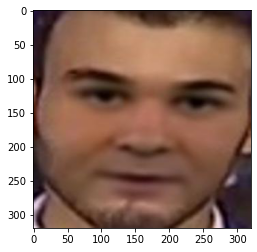

In [ ]:
print(type(fake))
print(fake.shape)
plt.imshow(fake[995])
# np.save("fake_3d", fake)

## Flatten $X_{fake}$

In [ ]:
# flatten X
X_fake = []
for i in range(len(fake)):
  X_fake.append(np.ndarray.flatten(fake[i]))
X_fake = np.array(X_fake)
print(X_fake.shape)
#print(type(X_fake))

# Label y
#y = np.zeros(shape=(10, 1))
#print(y.shape)

(998, 307200)


# Label "fake" as $Y$ features

In [ ]:
np_data = []
for i in range(len(X_fake)):
  np_data.append((X_fake[i], "fake"))
print(np_data)

[(array([133, 130, 115, ...,  71,  59,  71], dtype=uint8), 'fake'), (array([ 49,  40,  25, ..., 111, 105,  73], dtype=uint8), 'fake'), (array([28, 21, 15, ..., 49, 44, 40], dtype=uint8), 'fake'), (array([ 61,  61,  53, ..., 244, 246, 243], dtype=uint8), 'fake'), (array([15, 14, 19, ..., 88, 66, 53], dtype=uint8), 'fake'), (array([ 1,  1,  1, ..., 18, 14, 11], dtype=uint8), 'fake'), (array([91, 61, 63, ..., 29, 20, 67], dtype=uint8), 'fake'), (array([250, 187, 143, ..., 100,  99, 104], dtype=uint8), 'fake'), (array([26, 25, 31, ..., 14, 15, 20], dtype=uint8), 'fake'), (array([36, 32, 20, ..., 38, 30, 17], dtype=uint8), 'fake'), (array([ 51,  37,  34, ..., 179, 158, 131], dtype=uint8), 'fake'), (array([163, 146, 164, ..., 109,  55, 104], dtype=uint8), 'fake'), (array([ 63,  58,  65, ..., 255, 247, 253], dtype=uint8), 'fake'), (array([ 53,  41,  29, ..., 164, 180, 196], dtype=uint8), 'fake'), (array([110,  32,  32, ..., 188, 149, 180], dtype=uint8), 'fake'), (array([29, 18, 52, ..., 13, 1

In [ ]:
"""
X = []
y = []
for i in data:
  X.append(i[0])
  y.append(i[1])
print(len(X))
print(len(y))
"""

# Real
## Set the Real Working Directory
Finally, we decide to use only one image in a single video

In [ ]:
%cd /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Real_facial_extractions
!pwd

/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Real_facial_extractions
/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Real_facial_extractions


In [ ]:
# initial directory 
cwd = os.getcwd()
path_org = './' # the directory where all the output result are located.
extension = 'jpg'

filename = get_list_filenames(cwd, path_org, extension)

Successfully change the directory!
Number of files:  7000
Restoring the path
Current directory is- /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data/Real_facial_extractions


In [ ]:
print(filename[6999])
print(len(filename))

image_999.jpg
7000


## Save Real features in an array

In [ ]:
real = []
for i in range(len(filename)):
  # add constraint
  if i % 7 == 0:
    real.append(imageio.imread(filename[i]))
    print("Saving Img {} in an array".format(str(i)))
real = np.array(real)
print(real.shape)

Saving Img 0 in an array
Saving Img 7 in an array
Saving Img 14 in an array
Saving Img 21 in an array
Saving Img 28 in an array
Saving Img 35 in an array
Saving Img 42 in an array
Saving Img 49 in an array
Saving Img 56 in an array
Saving Img 63 in an array
Saving Img 70 in an array
Saving Img 77 in an array
Saving Img 84 in an array
Saving Img 91 in an array
Saving Img 98 in an array
Saving Img 105 in an array
Saving Img 112 in an array
Saving Img 119 in an array
Saving Img 126 in an array
Saving Img 133 in an array
Saving Img 140 in an array
Saving Img 147 in an array
Saving Img 154 in an array
Saving Img 161 in an array
Saving Img 168 in an array
Saving Img 175 in an array
Saving Img 182 in an array
Saving Img 189 in an array
Saving Img 196 in an array
Saving Img 203 in an array
Saving Img 210 in an array
Saving Img 217 in an array
Saving Img 224 in an array
Saving Img 231 in an array
Saving Img 238 in an array
Saving Img 245 in an array
Saving Img 252 in an array
Saving Img 259 in 

<class 'numpy.ndarray'>
(1000, 320, 320, 3)


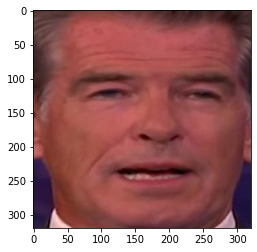

In [ ]:
print(type(real))
print(real.shape)
plt.imshow(real[999])
# np.save("fake_3d", fake)

## Flatten $X_{real}$

In [ ]:
# flatten X
X_real = []
for i in range(len(real)):
  X_real.append(np.ndarray.flatten(real[i]))
X_real = np.array(X_real)
print(X_real.shape)
#print(type(X_fake))

# Label y
#y = np.zeros(shape=(len(filename), 1))
#print(y.shape)

(1000, 307200)


# Label "real" as $Y$ features

In [ ]:
for i in range(len(X_real)):
  # use the data [] that we have saved the result from "fake" session
  np_data.append((X_real[i], "real"))
print(np_data[-1])

(array([81, 51, 41, ..., 38, 27, 69], dtype=uint8), 'real')


# Save the Data

In [ ]:
%cd /content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data
!pwd
np_data = np.array(np_data, dtype=object)
#np.savez_compressed("np_data.npz", np_data)
np.save("np_data.npy", np_data)

/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data
/content/drive/MyDrive/American_University/2021_Fall/DATA-793-001_Data Science Practicum/data


# Define the $X$ and $y$

In [ ]:
X = []
y = []
for i in np_data:
  X.append(i[0])
  y.append(i[1])
print(len(X))
print(len(y))
print("The length should be " + str((6984+7000)/7))

1998
1998
The length should be 13984


# Machine Learning Task

In [ ]:
"""
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler # standardize features by removing the mean and scaling to unit variance.
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) #clf = classifer
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)
"""

array([[124,  83],
       [ 58, 135]])

In [ ]:
"""
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
"""

0.6475

# Testing Zone

In [ ]:
"""
# Program to concatenate two 2D arrays column-wise
# import numpy
import numpy as np
 
# Creating two 2D arrays
arr1 = np.arange(1,10).reshape(3,3)
arr2 = np.arange(10,19).reshape(3,3)
arr1
arr2
 
# Concatenating operation
# axis = 1 implies that it is being done column-wise
np.concatenate((arr1,arr2),axis=1)
"""

array([[ 1,  2,  3, 10, 11, 12],
       [ 4,  5,  6, 13, 14, 15],
       [ 7,  8,  9, 16, 17, 18]])

In [ ]:
"""
import numpy as np
  
# creating a numpy array
array = np.array([['a', 'b', 'c'],
                  ['d', 'e', 'f'],
                  ['g', 'h', 'i']])
  
# convert nympy array to dictionary
d = dict(enumerate(array.flatten(), 1))
  
# print numpy array
print(array)
print(type(array))
  
# print dictionary
print(d)
print(type(d))
"""

[['a' 'b' 'c']
 ['d' 'e' 'f']
 ['g' 'h' 'i']]
<class 'numpy.ndarray'>
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i'}
<class 'dict'>


# References
- https://www.geeksforgeeks.org/python-os-chdir-method/
- https://stackoverflow.com/questions/9234560/find-all-csv-files-in-a-directory-using-python/12280052 
- https://machinelearningmastery.com/how-to-save-a-numpy-array-to-file-for-machine-learning/
- https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/ch05.html#idm45022165153592